`Pythonista - Saurus Ztrimus`

# Module 3- Regression & Beta Calculation

## Fundamental analysis using Regression
This module would introduce us to the Regression related inferences to be drawn from the data.

Regression is basically a statistical approach to find the relationship between variables. In machine learning, this is used to predict the outcome of an event based on the relationship between variables obtained from the data-set. More often than not, we utilize linear regression to come up with an ideal inference. We'd be using the regression model to solve the following problems:

## Problem Statements
1. [Query 3.1](#id1)
2. [Query 3.2](#id2)

## <a id=id1>Query 3.1 </a>
Import the file 'gold.csv', which is contains the data about last 2 years price action of Indian(MCX) gold standard. Explore the dataframe. You'd see 2 unique columns - 'Pred' and 'new'.

One of the 2 columns is a linear combination of the OHLC prices with varying coefficients while the other is a polynomial fucntion of the same inputs. Also, one of the 2 columns is partially filled.

>Using linear regression, find the coefficients of the inputs and using the same trained model, complete the
      entire column.
      
>Also, try to fit the other column as well using a new linear regression model. Check if the predicitons are 
      accurate.
      Mention which column is a linear function and which is a polynomial function.
      (Hint: Plotting a histogram & distplot helps in recognizing the  discrepencies in prediction, if any.)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#### 3.1.1 Import the file 'gold.csv'

In [2]:
gold_data = pd.read_csv('./GOLD.csv')
gold_data.columns = ['Date', 'Price', 'Open', 'High', 'Low', 'Vol', 'Change_Pct', 'Pred', 'new']
gold_data.Date = pd.to_datetime(gold_data.Date)
gold_data.set_index('Date', inplace=True)
gold_data.head()

,Price,Open,High,Low,Vol,Change_Pct,Pred,new
Date,,,,,,,,
2017-05-04,28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
2017-05-05,28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
2017-05-08,28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
2017-05-09,27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
2017-05-10,28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318


#### 3.1.2 Making some changes 

In [3]:
gold_data.Vol = gold_data.Vol.str.replace('K','').astype(float)
gold_data.Vol = gold_data.Vol * 1000
gold_data.Change_Pct = gold_data.Change_Pct.str.replace('%','').astype(float)

In [4]:
gold_data.head()

,Price,Open,High,Low,Vol,Change_Pct,Pred,new
Date,,,,,,,,
2017-05-04,28060,28400,28482,28025,80.0,-1.79,738.0,117.570740
2017-05-05,28184,28136,28382,28135,60.0,0.44,-146.0,295.430176
2017-05-08,28119,28145,28255,28097,7850.0,-0.23,30.0,132.123714
2017-05-09,27981,28125,28192,27947,10100.0,-0.49,357.0,101.298064
2017-05-10,28007,28060,28146,27981,9280.0,0.09,124.0,112.153318


#### 3.1.3 Linear Regression
Using linear regression, find the coefficients of the inputs and using the same trained model, complete the entire column.

In [5]:
# Missing values in Pred Columns
Pred_NaN_count = len(gold_data[gold_data.Pred.isna()])

# Creating suitable dataset for regression model
dataset = gold_data[['Open', 'High', 'Low', 'Price', 'Pred']].iloc[:-Pred_NaN_count]
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1:]

# divding dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Linear regression model
regressor = LinearRegression()
# Finding best fit line
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### 3.1.4 find the coefficients of the inputs

In [6]:
regressor.coef_

array([[ 3., -1., -4.,  2.]])

In [7]:
y_pred = regressor.predict(X_test)
score_regressor = r2_score(y_test.values, y_pred)
print("Accuracy Score in case of 'Pred' column: ", score_regressor)

Accuracy Score in case of 'Pred' column:  1.0


#### 3.1.5 complete the entire column.

In [8]:
# Calculate the Values for remaining "Pred" column's value
missing_Pred_values = regressor.predict(gold_data[gold_data.Pred.isna()][['Open', 'High', 'Low', 'Price']])
gold_data.loc[:,'Pred'][-Pred_NaN_count:] = missing_Pred_values.ravel()
gold_data.tail()

,Price,Open,High,Low,Vol,Change_Pct,Pred,new
Date,,,,,,,,
2019-04-26,31868,31851,31934,31705,9670.0,0.08,535.0,247.177322
2019-04-30,31625,31800,31824,31597,6440.0,-0.76,438.0,52.201158
2019-05-01,31563,31604,31657,31503,1550.0,-0.20,269.0,113.293305
2019-05-02,31203,31420,31425,31160,480.0,-1.14,601.0,48.365693
2019-05-03,31341,31250,31500,31163,80.0,0.44,280.0,429.924911


#### 3.1.6  try to fit the other column as well using a new linear regression model. Check if the predicitons are accurate.

In [9]:
# Dataset for regression model for new columns
new_X = gold_data[['Open', 'High', 'Low', 'Price']]
new_y = gold_data.new

# divding dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(new_X, new_y, test_size=0.2, random_state=0)

# Linear regression model
new_regressor = LinearRegression()
# Finding best fit line
new_regressor.fit(X_train, y_train)
new_regressor.coef_

array([-1.00029997,  1.0051232 , -1.01793823,  1.01303944])

#### 3.1.7 Predictions Accuracy

In [10]:
y_pred = new_regressor.predict(X_test)
score_new_regressor = r2_score(y_test.values, y_pred)
print("Accuracy Score in case of 'new' column: ", score_new_regressor)

Accuracy Score in case of 'new' column:  0.9999901742208236


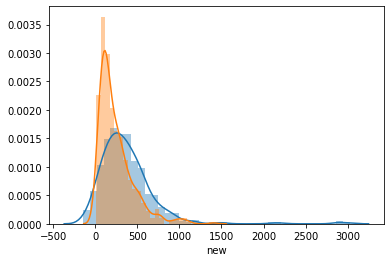

In [11]:
sns.distplot(gold_data.Pred)
sns.distplot(gold_data.new)
plt.show()

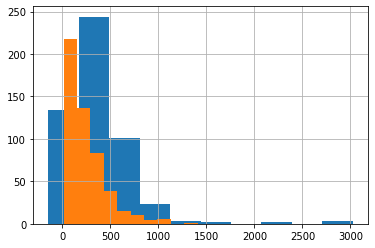

In [12]:
gold_data.Pred.hist()
gold_data.new.hist()
plt.show()

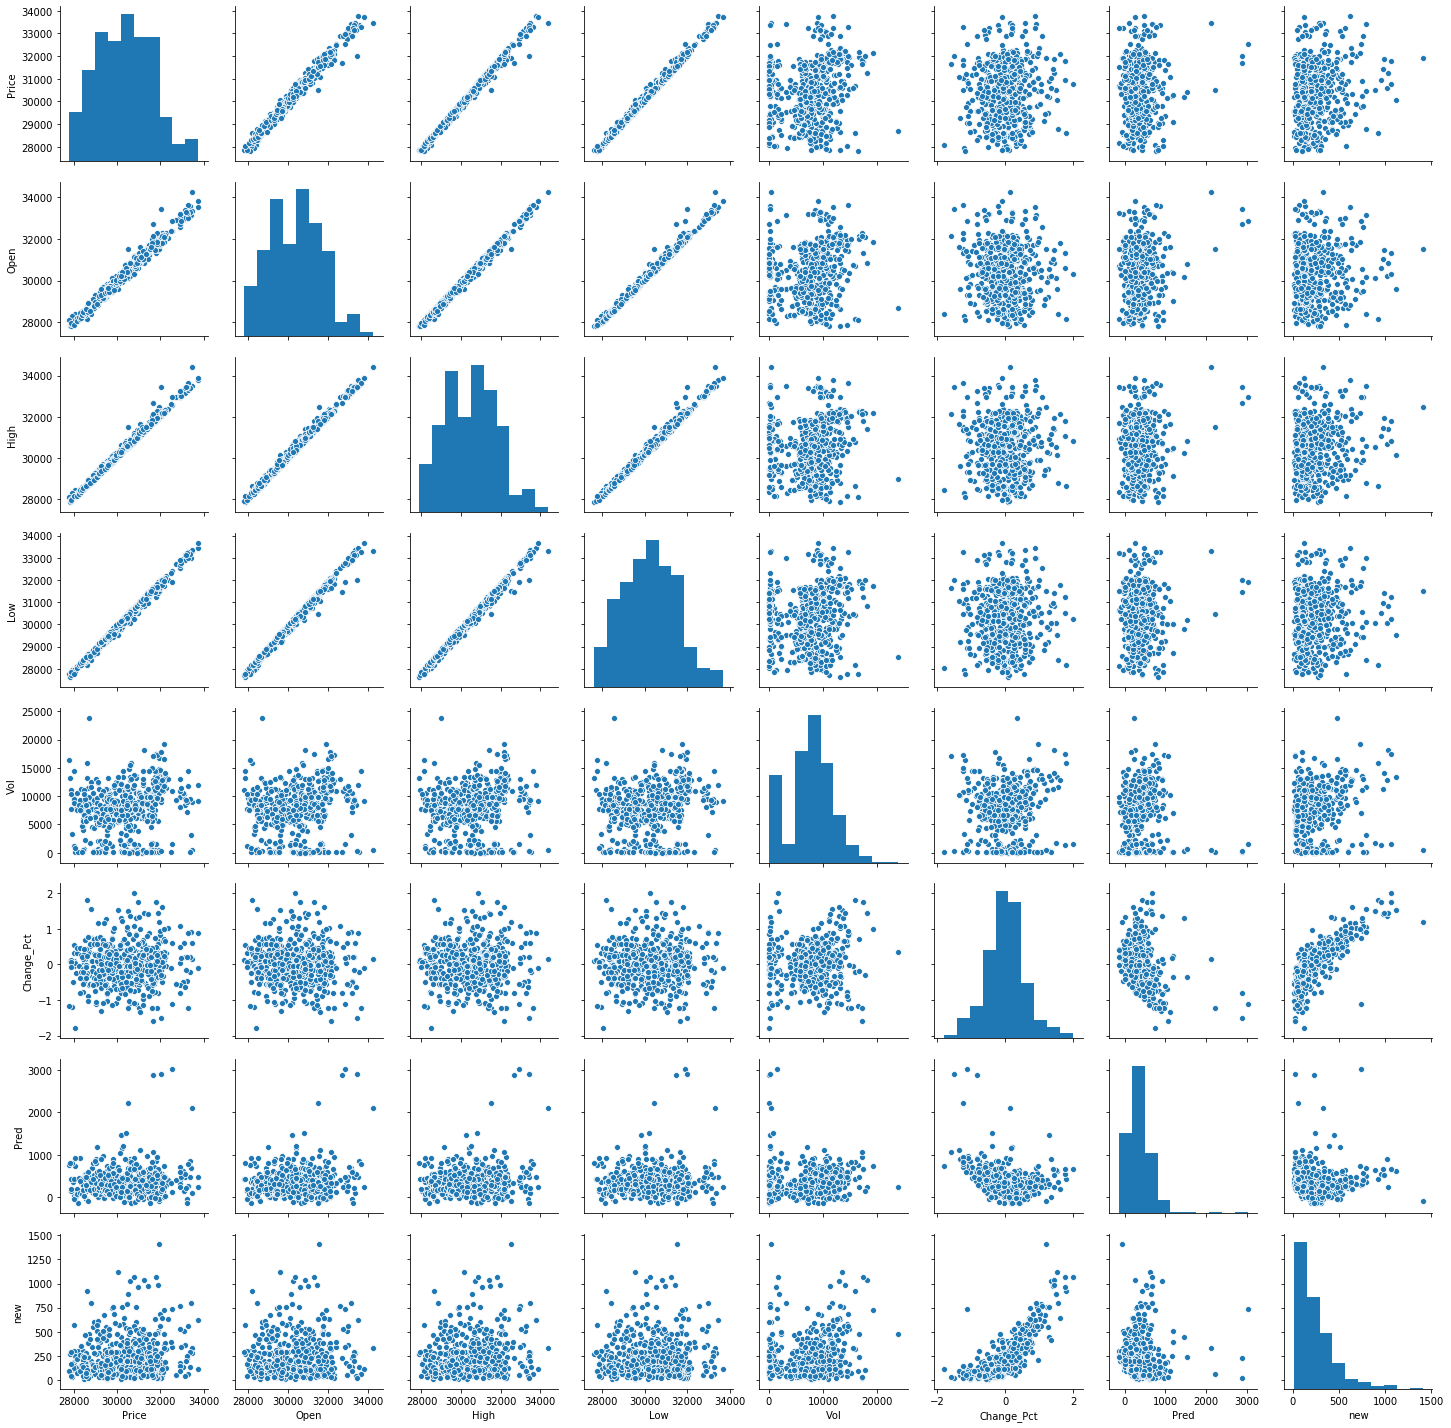

In [13]:
sns.pairplot(gold_data)
plt.show()

#### Result

- **Pred** Column is a linear combination of the OHLC prices with varying coefficients and partially filled.
- **new** Column is a polynomial function of the same inputs.

### CAPM CAPM Analysis and Beta Calculation using regression -<br>
CAPM(Capital Asset Pricing Model) attempts to price securities by examining the relationship that exists between expected returns and risk.<br>
Read more about CAPM. [(Investopedia CAPM reference)](https://www.investopedia.com/terms/c/capm.asp)<br>
The Beta of an asset is a measure of the sensitivity of its returns relative to a market benchmark (usually a market index). How sensitive/insensitive is the returns of an asset to the overall market returns (usually a market index like S&P 500 index). What happens when the market jumps, does the returns of the asset jump accordingly or jump somehow?<br>
Read more about Beta [(Investopedia Beta reference)](https://www.investopedia.com/investing/beta-know-risk/)

#### Watch the [Video on Captial Asset Pricing Model](https://www.youtube.com/watch?v=9rJ65chlwt4) to Understand completely and neatly.

## <a id=id2>Query 3.2 </a>
Import the stock of your choosing AND the Nifty index.<br>
Using linear regression (OLS), calculate -<br>

> - The daily Beta value for the past 3 months. (Daily= Daily returns)<br>
> - The monthly Beta value. (Monthly= Monthly returns)

Refrain from using the (covariance(x,y)/variance(x)) formula.<br>
Attempt the question using regression.[(Regression Reference)](https://financetrain.com/calculating-beta-using-market-model-regression-slope/)<br>
Were the Beta values more or less than 1 ? What if it was negative ?<br>
Discuss. Include a brief writeup in the bottom of your jupyter notebook with your inferences from the Beta values and regression results 

Steps to Calculate Beta
1. Calcute Daily returns of Gold
1. Calcute Daily returns of Nifty
$$Daily Returns = \frac{{}Close Price - Prev price}{Prev Price}$$

#### 3.2.1 The daily Beta value for the past 3 months. (Daily= Daily returns)

In [14]:
months = 3
days = months * 21

# Reading sulzon Stock and nifty index data
sulzon = pd.read_csv("./stock_data/SUZLON.csv")
nifty = pd.read_csv("./Nifty50.csv")

# Taking SULZON Stock of past 3 months
sulzon_stock = sulzon.tail(days)
sulzon_stock.Date = pd.to_datetime(sulzon_stock.Date)
sulzon_stock = sulzon_stock.set_index('Date')

# Taking Nifty50 index of past 3 months
nifty_stock = nifty.tail(days)
nifty_stock.Date = pd.to_datetime(nifty_stock.Date)
nifty_stock = nifty_stock.set_index('Date')

In [15]:
# Daily Returns of SULZON stock for last 3 months
sulzon_daily_return = sulzon_stock['Close Price'].pct_change().dropna()

# Daily Returns of Nifty50 index for last 3 months
nifty_daily_return = nifty_stock.Close.pct_change().dropna()

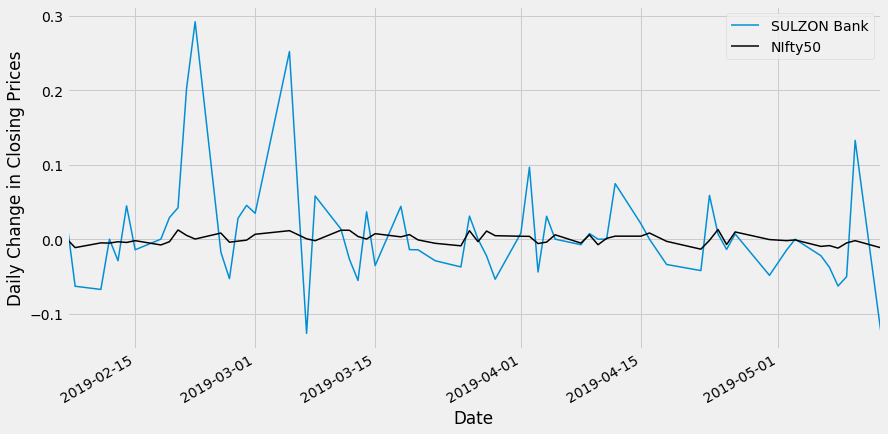

In [16]:
with plt.style.context('fivethirtyeight'):
    sulzon_daily_return.plot(figsize=(13,7),label='SULZON Bank', linewidth=1.5)
    nifty_daily_return.plot(color='k', figsize=(13,7), label='Nifty50', linewidth=1.5)
    plt.ylabel("Daily Change in Closing Prices")
    plt.legend()
    plt.show()

In [17]:
# Reshaping for Regression Purpose
sulzon_daily_return = sulzon_daily_return.ravel().reshape(-1,1)
nifty_daily_return = nifty_daily_return.ravel().reshape(-1,1)

#### 3.2.2 Calculating  Daily Beta value using Linear Regression

In [18]:
daily_beta_regressor = LinearRegression()
daily_beta_regressor.fit(nifty_daily_return, sulzon_daily_return)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Daily Beta Value

In [19]:
# Beta Value
daily_beta_regressor.coef_.item()

3.4868570632863847

#### Code for Checking Beta for all Stocks

In [20]:
import os

months = 3
days = months * 21
# Taking Nifty50 index of past 3 months
nifty_stock = pd.read_csv("./Nifty50.csv").tail(days)
nifty_stock.Date = pd.to_datetime(nifty_stock.Date)
nifty_stock = nifty_stock.set_index('Date')

minn = 0
minn_stock = ''
maxx = 0
maxx_stock = ''

for file in os.listdir("./stock_data/"):
    # Taking SULZON Stock of past 3 months
    sulzon_stock = pd.read_csv("./stock_data/"+file).tail(days)
    sulzon_stock.Date = pd.to_datetime(sulzon_stock.Date)
    sulzon_stock = sulzon_stock.set_index('Date')
    
    # Daily Returns of SULZON stock for last 3 months
    sulzon_daily_return = sulzon_stock['Close Price'].pct_change().dropna().ravel().reshape(-1,1)

    # Daily Returns of Nifty50 index for last 3 months
    nifty_daily_return = nifty_stock.Close.pct_change().dropna().ravel().reshape(-1,1)
    daily_beta_regressor = LinearRegression()
    daily_beta_regressor.fit(nifty_daily_return, sulzon_daily_return)
    beta = daily_beta_regressor.coef_.item()
    if beta < minn:
        minn = beta
        minn_stock = sulzon_stock.Symbol[0]
    elif beta > maxx:
        maxx = beta
        maxx_stock = sulzon_stock.Symbol[0]
    print(sulzon_stock.Symbol[0]," : ", daily_beta_regressor.coef_.item(), "\n")

print("Maximum : ", maxx_stock," : ", maxx)
print("Minimum : ", minn_stock," : ", minn)

ADANIPORTS  :  0.7514023618074727 

ADANIPOWER  :  2.0324485166666686 

AJANTPHARM  :  0.7644861800825175 

AMARAJABAT  :  0.8454659155497127 

APOLLOTYRE  :  1.2067788716607342 

ASHOKA  :  1.653274893512687 

ASIANPAINT  :  0.7433300326987932 

AXISBANK  :  0.8969708964273772 

BAJAJELEC  :  1.5812125267239843 

BAJFINANCE  :  1.0050738793567981 

BERGEPAINT  :  0.9085547104337387 

BOMDYEING  :  2.0189600901553613 

BPCL  :  1.030279724989263 

CASTROLIND  :  0.6452496978373226 

CENTURYPLY  :  1.5830036001817103 

CIPLA  :  0.256003678280332 

CUMMINSIND  :  1.1905455197205908 

DHFL  :  -3.2583451492584437 

DRREDDY  :  0.45136029822032964 

EICHERMOT  :  0.7839918230241059 

EXIDEIND  :  1.0567306799479226 

FORTIS  :  0.48964451313609536 

GAIL  :  1.2307818959935017 

GMRINFRA  :  1.604833628431758 

GODREJIND  :  0.9625668179471562 

GUJALKALI  :  1.56188931548447 

HDFC  :  0.7020788565568702 

HDFCBANK  :  0.8253476940988895 

HEROMOTOCO  :  0.6948436104189342 

HINDALCO  : 

 #### Daily Beta Value 
- Maximum :  SUZLON  :  3.4868570632863847
- Minimum :  DHFL  :  -3.2583451492584437


#### 3.2.3 The Monthly Beta value. (Monthly= Monthly returns)

In [21]:
close_prices= pd.concat([sulzon['Date'],sulzon['Close Price'],nifty['Close']],axis=1)
close_prices.columns = ['Date','SULZON', 'Nifty']
close_prices.head()

,Date,SULZON,Nifty
0,15-May-2017,19.6,9445.40
1,16-May-2017,19.7,9512.25
2,17-May-2017,19.9,9525.75
3,18-May-2017,20.0,9429.45
4,19-May-2017,20.6,9427.90


In [22]:
close_prices.Date =  pd.to_datetime(close_prices.Date)
close_prices['monthwise'] = pd.to_datetime(close_prices['Date']).dt.to_period('M')
monthly_data=close_prices.groupby(['monthwise']).mean()
monthly_data

,SULZON,Nifty
monthwise,,
2017-05,19.657692,9498.557692
2017-06,18.861905,9606.954762
2017-07,18.911905,9850.119048
2017-08,16.819048,9901.183333
2017-09,16.447619,9977.916667
2017-10,15.705000,10138.677500
2017-11,14.763636,10324.754545
2017-12,14.090000,10322.262500
2018-01,15.440909,10771.154545


In [23]:
close_prices_monthly_change = monthly_data.pct_change(fill_method='ffill')*100
close_prices_monthly_change = close_prices_monthly_change.dropna(axis=0)
close_prices_monthly_change.shape

(24, 2)

In [24]:
X = close_prices_monthly_change.Nifty.ravel().reshape(-1,1)
y = close_prices_monthly_change.SULZON.ravel().reshape(-1,1)

In [25]:
monthly_beta_regressor = LinearRegression()
monthly_beta_regressor.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Monthly Beta Value

In [26]:
monthly_beta_regressor.coef_.item()

2.700480036565816

#### 3.2.4 Conclusion
- **Were the Beta values more or less than 1 ?**

Beta Values is more than 1.

- **What if it was negative ?**

A negative beta correlation would mean an investment that moves in the opposite direction from the stock market. When the market rises, then a negative-beta investment generally falls. When the market falls, then the negative-beta investment will tend to rise.

- **Inferences from the Beta Values and Regression results** 

    - Beta measures the volatility of a stock compared with the volatility of the market as a whole. 
    - A high beta means the stock price will move faster than a stock with low beta. High beta means high volatility, but also the possibility of high returns.
    - β=0: indicates no correlation with NIFTY or some chosen Index/Benchmark.
    - β=1: shows a stock has equally sensitive as the market.
    - β> 1: indicates a stock that’s more volatile/unstable than NIFTY.
    - β< 1: shows less sensitive than NIFTY
    - 1.45 is 45% more sensitive than NIFTY
    
    

- **Daily Beta for last 3 months:**

β = 3.4868

Beta is greater than one and greater than zero which means SULZON Stocks are moving in the same direction as NIFTY but at a very high rate. It moving 3 times fast than the market.


- **Monthly Beta Value:**

beta=2.7005 (β>1)

A beta is greater than one which means SULZON Stocks are moving in the same direction as NIFTY and at a higher rate. It moving 2 times fast than the market.

## My Interpretation

#### It shows SULZON stock is very volatile.
#### It very nice option for Intraday trading but not for long term trading.
#### Instead of investing all money in one stock we can diversify the stocks.
#### Due to high volatility we can get a very big return on investment by using the CAPM model